1. **Import Required Libraries**    

2. **Import Data**    

3. **Handle Missing Data**  

4. **Pairplot for Linear Relationships**  
5. **Select Your OLS Data**  
6. **Formulate OLS Equation**  

7. **Fit OLS Model**  

8. **Model Summary**  

9. **Regression Plot**  

10. **Model Assumption Checks:**
    - **Linearity:** Assess whether a predictor variable (X) maintains a linear relationship with the outcome variable (Y). 
    - **Normality:** Examine whether the errors (residuals) of the model are approximately normally distributed. 
    - **Independent Observations:** Ensure that each observation in your dataset is independent and not influenced by any external factors.
    - **Homoscedasticity:** Check if the variance of the errors remains relatively constant across different levels of the independent variables. This assumption is necessary for reliable inferences from the model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
data = pd.read_csv(r"C:\Users\lasra\Downloads\marketing_sales_data.csv")

In [3]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [4]:
data.shape

(572, 5)

In [5]:
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [6]:
data.isna().any(axis=1).sum()

3

In [7]:
data=data.dropna(axis=0)

In [8]:
data.isna().any(axis=1).sum()

0

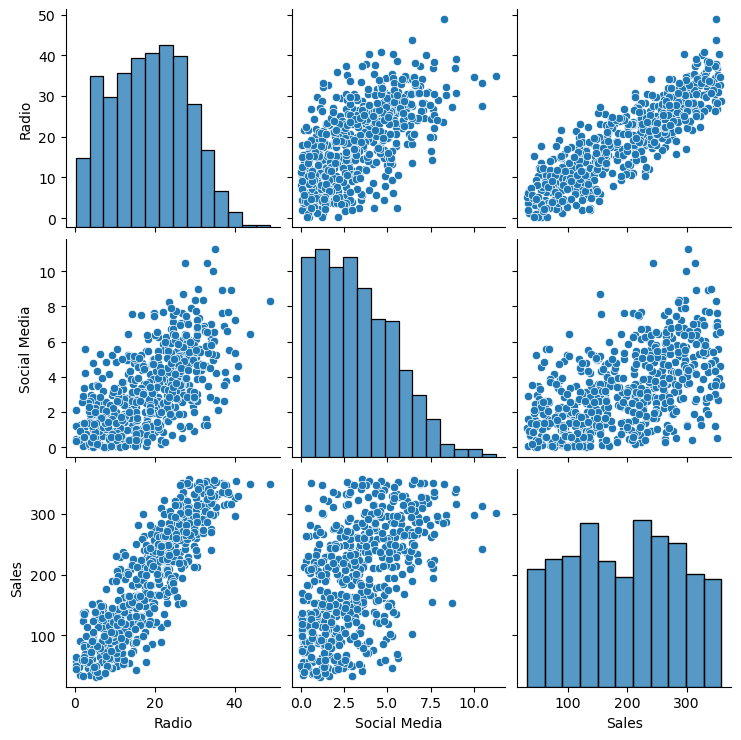

In [9]:
sns.pairplot(data)

In [10]:
ols_data= data[["Radio", "Sales"]]

In [11]:
ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [12]:
ols_formula="Sales~Radio"

In [13]:
OLS=ols(formula=ols_formula, data=ols_data)
model=OLS.fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):          2.07e-176
Time:                        11:08:26   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Radio', ylabel='Sales'>

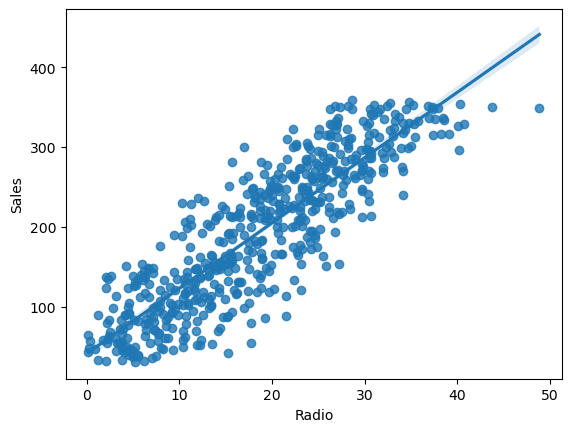

In [15]:
sns.regplot(x="Radio", y="Sales", data = ols_data)

In [16]:
residuals = model.resid

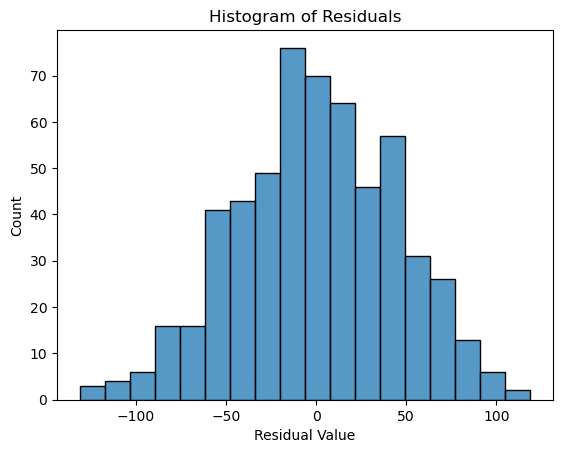

In [17]:
fig=sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

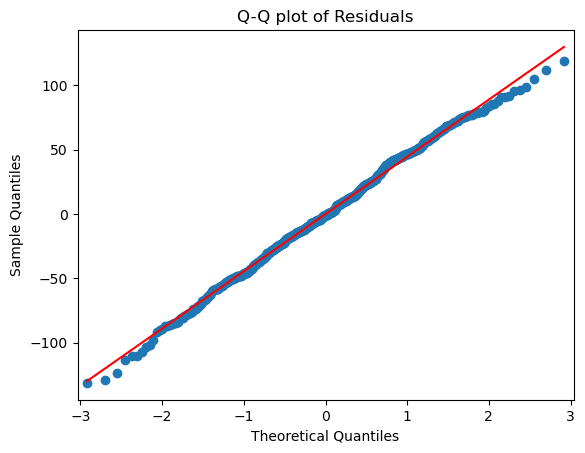

In [18]:
sm.qqplot(residuals, line ='s')
plt.title("Q-Q plot of Residuals")
plt.show()

In [19]:
fitted_values= model.predict(ols_data["Radio"])

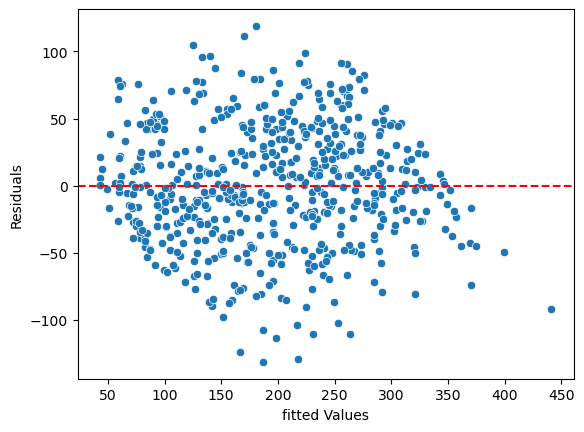

In [20]:
fig=sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0, color="red", linestyle="--")
fig.set_xlabel("fitted Values")
fig.set_ylabel("Residuals")
plt.show()